In [50]:
import sys
import os

# Get the current directory
current_directory = os.getcwd()

# Add the current directory to the Python path
sys.path.append(current_directory)
print(current_directory)
from spectraltools import Specimen_Collection, Spectrum, create_path_if_not_exists
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import re
import scipy


C:\Users\esteb\cicima\escarabajos\gamma


In [51]:
"""This section allows the user to choose their workplace location.
This is important if the user has multiple locations and operating systems in which this 
script is run"""

#select location
working_at = "wfh"

#Training data is used when we are already certain of species and genera for a particular sample
training_data_is_used = False

if working_at == "colaboratory":
  from google.colab import drive
  drive.mount("/content/drive")
  #base folder
  """Select the location for your base folder"""
    
  base_folder = r"/content/drive/My Drive/CICIMA/escarabajos_files"
  
elif working_at == "wfh":

    """Select the location of your base folder"""
    base_folder = r"C:\Users\esteb\cicima\escarabajos"

elif working_at == "cicima_desktop":
  
    """Select the location of your base folder"""
    base_folder = r"C:\Users\EstebanSoto\Jupyter\escarabajos"

elif working_at == "cicima_laptop":
    
    """Select the location of your base folder"""
    base_folder = r"/home/vinicio/escarabajos"

#define the location of the tables with information about the collections and its parent directory

collection_tables_main_path =  os.path.join(base_folder, "L1050_data","collections")
collection_files_main_path = os.path.join(base_folder, "L1050_data")

# Define report location
report_location = os.path.join(base_folder, "reports","data_analysis")

#collection_descriptor = r"CICIMAUCR and ANGSOL" tododelete

#File location and metadata location for collection 1
angsol_collection_path = os.path.join(collection_files_main_path,"ANGSOL","average") 
angsol_collection_metadata = os.path.join(collection_tables_main_path,"CICIMA-beetles-general-inventory - ANGSOL.txt") 

#File location and metadata location for collection 2
cicimaucr_collection_path = os.path.join(collection_files_main_path,r"TRA_data_CICIMA_INBUCR","CICIMAUCR","reflectance")  #listo
cicimaucr_collection_2_path = os.path.join(collection_files_main_path,r"CICIMA-2024-01-REFLECTANCE","average")
cicimaucr_collection_3_path = os.path.join(collection_files_main_path,r"CICIMA-2024-03-REFLECTANCE","without iris nor lens","average")
cicima_ucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - CICIMAUCR.txt") 

#File location and metadata location for collection 3
inbucr_collection_path = os.path.join(collection_files_main_path,r"INBUCR","average") #listo
inbucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - INBUCR.txt") 

#File location and metadata location for collection 4
bioucr_collection_path = os.path.join(collection_files_main_path,r"BIOUCR","average")  #listo
bioucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - BIOUCR.txt") 

#agregated data location, here averages and std will be saved when training data and retreived when classifying spectra
agregated_data_location = os.path.join(base_folder, "agregated_data")
agregated_data_avg_path = os.path.join(agregated_data_location,"peak_averages_krc.txt" )  #listo
agregated_data_std_path  = os.path.join( agregated_data_location , r"peak_std_krc.txt") #listo




In [74]:
#Collections
angsol_collection = Specimen_Collection("ANGSOL", angsol_collection_path, angsol_collection_metadata, "HIGH")
angsol_collection.set_description("ANGSOL collection has specimens that belong to Angel Solís. The confidence that we have about specimen identification is high.")

cicimaucr_collection = Specimen_Collection("CICIMAUCR1", cicimaucr_collection_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_2 = Specimen_Collection("CICIMAUCR2", cicimaucr_collection_2_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_3 = Specimen_Collection("CICIMAUCR3", cicimaucr_collection_3_path, cicima_ucr_metadata, "HIGH")
inbucr_collection = Specimen_Collection("INBUCR", inbucr_collection_path, inbucr_metadata, "MID")
bioucr_collection = Specimen_Collection("BIOUCR", bioucr_collection_path, bioucr_metadata, "LOW")

collection_list = [
                    angsol_collection,
                    cicimaucr_collection,
                    cicimaucr_collection_2,
                    cicimaucr_collection_3,
                    inbucr_collection,
                    #bioucr_collection,
                    ]
collection_names_set = set([collection.name for collection in collection_list])
collection_names = " ".join( sorted(collection_names_set))
print(collection_names)
#date
from datetime import datetime
current_date = datetime.now().date()

ANGSOL CICIMAUCR1 CICIMAUCR2 CICIMAUCR3 INBUCR


In [75]:
def get_filtered_spectra(collection_list):

    all_spectra = []
    
    for collection in collection_list:
        all_spectra += collection.get_spectra()

    all_spectra = [item for item in all_spectra if item.get_species() in ["kalinini", "resplendens", "cupreomarginata"]]
    return all_spectra
    
all_spectra = get_filtered_spectra(collection_list)

for spectrum in all_spectra:
    print(spectrum.get_species())

resplendens
kalinini
cupreomarginata
kalinini
resplendens
kalinini
cupreomarginata
kalinini
kalinini
kalinini
kalinini
cupreomarginata
resplendens
cupreomarginata
resplendens
cupreomarginata
cupreomarginata
resplendens
resplendens
resplendens
resplendens
kalinini
cupreomarginata
cupreomarginata
resplendens
resplendens
resplendens
resplendens
kalinini
kalinini
kalinini
cupreomarginata
resplendens
cupreomarginata


In [109]:
class Metric():
    """This is an abstract class that represents every metric, allows it to be compared, have a description and a name.
    This is useful when using it in the report methods """
    
    def get_metric_value(self, spectrum):
        metric_value = None
        return metric_value

    def __init__(self, spectrum):
        self.name = "Metric"
        self.spectrum = spectrum
        self.metric_value = self.get_metric_value(spectrum)

    @staticmethod
    def name():
        return self.name

    @staticmethod
    def description():
        return "No description yet"

    def __lt__(self, other):
        return self.metric_value < other.metric_value

    def __repr__(self):
        return f'{self.name} value: {self.metric_value} for {self.spectrum.genus} {self.spectrum.species}. File: {self.spectrum.filename}'

In [110]:
class Gamma_Arbitrary_Limits(Metric):
    """This gamma metric calculates the ratio between the maximum in the IR range and the maximum in the visible range. Ranges are static."""
    uv_vis_min_wavelength, uv_vis_max_wavelength = 250.00, 1000.00
    ir_min_wavelength = uv_vis_max_wavelength
    ir_max_wavelength = 2500.00
        
    def get_metric_value(self, spectrum):
        def get_maximum_in_range(spectrum, min_wavelength, max_wavelength):
            measuring_mode = spectrum.metadata["measuring_mode"]
            df = spectrum.data
            max_value = df[(df["wavelength"] > min_wavelength) & (df["wavelength"]  < max_wavelength) ].max()
            #print(f"max value \n {max_value}")
            wavelength, measure = max_value["wavelength"], max_value[measuring_mode]
            return wavelength, measure

        uv_vis_wavelength, uv_vis_max = get_maximum_in_range(spectrum, Gamma_Arbitrary_Limits.uv_vis_min_wavelength, Gamma_Arbitrary_Limits.uv_vis_max_wavelength)
        ir_wavelength, ir_max = get_maximum_in_range(spectrum, Gamma_Arbitrary_Limits.ir_min_wavelength, Gamma_Arbitrary_Limits.ir_max_wavelength)
        metric_value = (uv_vis_max / ir_max)*1.00
        
        return metric_value

    def __init__(self, spectrum):
        self.name = "Gamma_Arbitrary_Limits"
        self.spectrum = spectrum
        self.metric_value = self.get_metric_value(spectrum)

    
    @staticmethod
    def description():
        return f"""This algorithm calculates the ratio between the highest reflectance peak in the visible range (Between {Gamma_Arbitrary_Limits.uv_vis_min_wavelength} nm and {Gamma_Arbitrary_Limits.uv_vis_max_wavelength} nm)
                and the maximum peak in the IR range up to {Gamma_Arbitrary_Limits.ir_max_wavelength} nm. Beyond {Gamma_Arbitrary_Limits.ir_max_wavelength} nm the internal structure's reflectance generates unwanted noise."""
    def __repr__(self):
        return f'Gamma arbitrary limits, value: {self.metric_value:.4f} for {self.spectrum.genus} {self.spectrum.species}. File: {self.spectrum.filename}'

In [111]:
for spectrum in all_spectra:
    print(Gamma_Arbitrary_Limits(spectrum))

Gamma arbitrary limits, value: 1.1390 for Chrysina resplendens. File: ANGSOL0011-3.Sample.ASC
Gamma arbitrary limits, value: 1.3410 for Chrysina kalinini. File: ANGSOL0012-3.Sample.ASC
Gamma arbitrary limits, value: 1.0165 for Chrysina cupreomarginata. File: ANGSOL0013-3.Sample.ASC
Gamma arbitrary limits, value: 1.1098 for Chrysina kalinini. File: ANGSOL0017-3.Sample.ASC
Gamma arbitrary limits, value: 2.0756 for Chrysina resplendens. File: C.RESP.MV23-TX3.ASC
Gamma arbitrary limits, value: 1.7943 for Chrysina kalinini. File: C.KALI.LA22-TX3.ASC
Gamma arbitrary limits, value: 2.7720 for Chrysina cupreomarginata. File: C.CUPR.MV23-TX3.ASC
Gamma arbitrary limits, value: 1.3015 for Chrysina kalinini. File: CICIMAUCR0001-5.Sample.ASC
Gamma arbitrary limits, value: 1.1897 for Chrysina kalinini. File: CICIMAUCR0006-3.Sample.ASC
Gamma arbitrary limits, value: 1.4107 for Chrysina kalinini. File: CICIMAUCR0008-5.Sample.ASC
Gamma arbitrary limits, value: 1.2967 for Chrysina kalinini. File: CICIMA

In [112]:
class Gamma_First_Two_Peaks(Metric):
    """This gamma metric calculates the ratio between the second and first peak."""
    
    def get_metric_value(self, spectrum):
        #get list of maxima and minima
        max_i, max_x, max_y = spectrum.get_maxima()
        #Divide second peak over first peak
        metric_value = max_y[1]/max_y[0]
        return metric_value

    def __init__(self, spectrum):
        self.name = "Gamma_First_Two_Peaks"
        self.spectrum = spectrum
        self.metric_value = self.get_metric_value(spectrum)

    @staticmethod
    def description():
        return f"""This algorithm calculates the ratio between the second and first reflectance peak."""

    def __repr__(self):
        return f'Gamma first two peaks {self.metric_value} for {self.spectrum.genus} {self.spectrum.species} in {self.spectrum.filename}'

In [113]:
for spectrum in all_spectra:
    print(Gamma_First_Two_Peaks(spectrum))

Gamma first two peaks 0.929661563053092 for Chrysina resplendens in ANGSOL0011-3.Sample.ASC
Gamma first two peaks 1.5175798096006232 for Chrysina kalinini in ANGSOL0012-3.Sample.ASC
Gamma first two peaks 1.195023840653329 for Chrysina cupreomarginata in ANGSOL0013-3.Sample.ASC
Gamma first two peaks 1.3002852294600524 for Chrysina kalinini in ANGSOL0017-3.Sample.ASC
Gamma first two peaks 1.061263556672878 for Chrysina resplendens in C.RESP.MV23-TX3.ASC
Gamma first two peaks 1.2894620099264786 for Chrysina kalinini in C.KALI.LA22-TX3.ASC
Gamma first two peaks 0.856289595722265 for Chrysina cupreomarginata in C.CUPR.MV23-TX3.ASC
Gamma first two peaks 1.3487478209551182 for Chrysina kalinini in CICIMAUCR0001-5.Sample.ASC
Gamma first two peaks 1.6205813522532078 for Chrysina kalinini in CICIMAUCR0006-3.Sample.ASC
Gamma first two peaks 1.2985383862885052 for Chrysina kalinini in CICIMAUCR0008-5.Sample.ASC
Gamma first two peaks 1.2139860804964966 for Chrysina kalinini in CICIMAUCR0009-3.Sampl

In [117]:
class Gamma_Area_Under_Curve_Naive(Metric):
    #this is a subclass of Gamma
    #get_gamma_factor must be redefined
    visible_start_wavelength = 450
    visible_end_wavelength = ir_start_wavelength = 800
    ir_end_wavelength = 1500

    def __init__(self, spectrum):
        self.name = "Gamma_Area_Under_Curve_Naive"
        self.spectrum = spectrum
        self.metric_value = self.get_metric_value(spectrum)
        
    @staticmethod
    def name():
        return "Gamma_area_under_curve_naive"

    def description():
        return f"""This method calculates the ratio between the area under the curve for the spectrum between {Gamma_Area_Under_Curve_Naive.visible_start_wavelength} 
        and {Gamma_Area_Under_Curve_Naive.visible_end_wavelength} nm (visible range) and between {Gamma_Area_Under_Curve_Naive.ir_start_wavelength} nm and 
        {GammaAreaUnderCurveNaive.ir_end_wavelength} nm (infrared range)."""


    def get_metric_value(self, spectrum):

        def get_area_under_curve(spectrum, start_wavelength, finish_wavelength):
            # Subset the DataFrame to the range of interest
            subset_df = df[(df['wavelength'] >= start_wavelength) & (df['wavelength'] <= finish_wavelength)]

            # Extract the wavelengths and heights as arrays
            wavelengths = subset_df['wavelength'].values
            heights = subset_df[spectrum.measuring_mode].values

            # Calculate the area under the curve using the trapezoidal rule
            area_under_curve = np.trapz(heights, wavelengths)

            print("Area under the curve:", area_under_curve)
            return area_under_curve

        import numpy as np
        df = spectrum.get_normalized_spectrum()
        area_uv_visible = get_area_under_curve(spectrum, Gamma_Area_Under_Curve_Naive.visible_start_wavelength, Gamma_Area_Under_Curve_Naive.visible_end_wavelength)
        area_ir = get_area_under_curve(spectrum, Gamma_Area_Under_Curve_Naive.ir_start_wavelength, Gamma_Area_Under_Curve_Naive.ir_end_wavelength)
        metric = area_ir/area_uv_visible
        return metric


In [118]:
for spectrum in all_spectra:
    print(Gamma_Area_Under_Curve_Naive(spectrum))

Area under the curve: 236.1784844487955
Area under the curve: 569.9981401838616
Gamma_Area_Under_Curve_Naive value: 2.4134211103697703 for Chrysina resplendens. File: ANGSOL0011-3.Sample.ASC
Area under the curve: 215.66619517900932
Area under the curve: 508.06796800679
Gamma_Area_Under_Curve_Naive value: 2.3558071657223727 for Chrysina kalinini. File: ANGSOL0012-3.Sample.ASC
Area under the curve: 216.42372220351183
Area under the curve: 631.666335680341
Gamma_Area_Under_Curve_Naive value: 2.918655724284975 for Chrysina cupreomarginata. File: ANGSOL0013-3.Sample.ASC
Area under the curve: 231.65248357628138
Area under the curve: 589.0289762020038
Gamma_Area_Under_Curve_Naive value: 2.5427267910470777 for Chrysina kalinini. File: ANGSOL0017-3.Sample.ASC
Area under the curve: 272.1085478830979
Area under the curve: 341.97176227351224
Gamma_Area_Under_Curve_Naive value: 1.2567475918486348 for Chrysina resplendens. File: C.RESP.MV23-TX3.ASC
Area under the curve: 230.80296073586317
Area under

In [127]:
class  Gamma_Area_First_Min_Cut(Metric):
    #this is a subclass of Gamma
    #get_gamma_factor must be redefined
    visible_range_start_wavelength = 450

    def __init__(self, spectrum):
        self.name = "gamma_area_under_curve_cut_first_minimum"
        self.spectrum = spectrum
        self.metric_value = self.get_metric_value(spectrum)
        
    def description():
        return f"""This algorithm calculates the area for the visible region (starting at {Gamma_Area_First_Min_Cut.visible_range_start_wavelength} 
        and ending in the first minima between the maximum in the visible range and the maximum in the IR range. 
        Then calculates the area of the IR range up to the second minumum. The ratio between these two areas is the gamma value."""

    def get_metric_value(self, spectrum):

        def get_area_under_curve(spectrum, start_wavelength, finish_wavelength):
            # Assuming your DataFrame is named df and has columns 'wavelength' and 'height'
            # Let's say you have start_wavelength and finish_wavelength variables for the range you want to integrate over
            # Subset the DataFrame to the range of interest
            subset_df = df[(df['wavelength'] >= start_wavelength) & (df['wavelength'] <= finish_wavelength)]

            # Extract the wavelengths and heights as arrays
            wavelengths = subset_df['wavelength'].values
            heights = subset_df[spectrum.measuring_mode].values

            # Calculate the area under the curve using the trapezoidal rule
            area_under_curve = np.trapz(heights, wavelengths)

            # print("Area under the curve:", area_under_curve)
            return area_under_curve

        import numpy as np

        #test_spectrum = filtered_spectra[0]
        #get the highest data recorded
        max_value = spectrum.data[spectrum.measuring_mode].max()
        #get maxima and minima
        x = spectrum.data["wavelength"].values
        y = spectrum.data[spectrum.measuring_mode].values

        #get x and y positions of maxima and minima
        max_i, max_xs, max_ys = spectrum.get_maxima()
        min_i, min_xs, min_ys= spectrum.get_minima()

        #get x locations of first and second maxima and the minimum in between
        first_max_x = max_xs[0]
        try:
            second_max_x = max_xs[1]
        except Exception as e:
            second_max_x = x.max()
            print(e)
        try:
            second_max_y = max_ys[1]
        except Exception as e:
            second_max_y = 0
            print(e)

        min_in_between_i = 0
        min_in_between_x =0
        min_in_between_y =0
        #get the location of the minimum in between
        for index in min_i:
            #print("index")
            if first_max_x <= x[index] <= second_max_x:
                min_in_between_i = index
                min_in_between_x = x[index]
                min_in_between_y = y[index]
                break

        # print(f"min in bet: {min_in_between_i} {min_in_between_x} {min_in_between_y} ")
        #second minimum
        #get the location of the second minimum
        min_after_second_max_i = 0
        min_after_second_max_x = 0
        min_after_second_max_y = 0
        for index in min_i:
            # print(f" second_max_x  <= x[index] { second_max_x  <= x[index]}")
            if second_max_x  <= x[index]:
                min_after_second_max_i = index
                min_after_second_max_x = x[index]
                min_after_second_max_y = y[index]
                break


        # print(f"min after: {min_after_second_max_i} {min_after_second_max_x} {min_after_second_max_y} ")

        x_values = [first_max_x, min_in_between_x, second_max_x, min_after_second_max_x]
        y_values = [max_ys[0]/max_value, min_in_between_y/max_value, second_max_y/max_value, min_after_second_max_y/max_value]
        #get the normalized spectrum
        df = spectrum.get_normalized_spectrum()
        #plot
        x = df["wavelength"].values
        y =df[spectrum.measuring_mode].values

        #modify y to have last value equal to first one
        y_mod = y
        y_mod[-1] = y_mod[0]
        
        #split x, y LEFT
        #print(f"fmi: {min_in_between_i}")
        x_left = x[:min_in_between_i]
        y_left = y[:min_in_between_i]
        #set last one to zero for picture to be displaye properly
        y_left[-1] = y_left[0]
        

        #split x, y RIGHT
        #print(f"min_after_second_max_i: {min_after_second_max_i}")
        x_right = x[min_in_between_i:min_after_second_max_i]
        y_right = y[min_in_between_i:min_after_second_max_i]
        #set last one to zero for picture to be displaye properly
        y_right[0] = y_right[-1] = y_left[0]
        
        #show figure

        area_uv_visible = get_area_under_curve(spectrum, Gamma_Area_First_Min_Cut.visible_range_start_wavelength, min_in_between_x)
        area_ir = get_area_under_curve(spectrum, min_in_between_x, min_after_second_max_x)
        gamma = area_ir/area_uv_visible
        #print(f"gamma: {gamma}")
        return gamma


In [128]:
for spectrum in all_spectra:
    print(Gamma_Area_First_Min_Cut(spectrum))

gamma_area_under_curve_cut_first_minimum value: 1.994419805270542 for Chrysina resplendens. File: ANGSOL0011-3.Sample.ASC
gamma_area_under_curve_cut_first_minimum value: 2.964096619011071 for Chrysina kalinini. File: ANGSOL0012-3.Sample.ASC
gamma_area_under_curve_cut_first_minimum value: 3.5575606302526923 for Chrysina cupreomarginata. File: ANGSOL0013-3.Sample.ASC
gamma_area_under_curve_cut_first_minimum value: 3.244327436653907 for Chrysina kalinini. File: ANGSOL0017-3.Sample.ASC
gamma_area_under_curve_cut_first_minimum value: 1.8487346529862647 for Chrysina resplendens. File: C.RESP.MV23-TX3.ASC
gamma_area_under_curve_cut_first_minimum value: 2.398936136980146 for Chrysina kalinini. File: C.KALI.LA22-TX3.ASC
gamma_area_under_curve_cut_first_minimum value: 2.065102740400307 for Chrysina cupreomarginata. File: C.CUPR.MV23-TX3.ASC
gamma_area_under_curve_cut_first_minimum value: 2.72266126355502 for Chrysina kalinini. File: CICIMAUCR0001-5.Sample.ASC
gamma_area_under_curve_cut_first_min

In [87]:
#Saving_averages is True only with trusty spectra
saving_averages = True
#This class gets the average and standard deviation per species for a particular Gamma class
def get_gamma_avg_and_std(Metric,filtered_spectra):
    
    #Calculate gammas
    metric_list = []

    for spectrum in filtered_spectra:
        #print(spectrum.get_normalized_spectrum())
        try:
            metric = Metric(spectrum)
            metric_list.append(metric)
        except Exception as e:
            print(e)
    #Order the list
    sorted(metric_list)
    #Create a dataframe
    metric_df = pd.DataFrame(columns=["species", "genus", "gamma", "code", "filename"])

    #add specimen information to the gammas
    for index, metric in enumerate(metric_list):
        metric_df.loc[index,"species"] = metric.spectrum.species
        metric_df.loc[index,"genus"] = metric.spectrum.genus
        metric_df.loc[index,"metric"] = metric.metric_value
        metric_df.loc[index,"code"] = metric.spectrum.code
        metric_df.loc[index,"filename"] = metric.spectrum.filename

    #get info on df
    grouped_stats = metric_df.groupby('species')['metric'].agg(['mean', 'std'])
    grouped_stats = grouped_stats.T
    print(grouped_stats)

    #save info in a file 
    #save information
    #path_location = agregated_data_location + "\\aggregated_data\\gamma"
    path_location = os.path.join(agregated_data_location, "metric_avg_std")
    create_path_if_not_exists(path_location)
    path_and_filename = os.path.join( path_location, f'{Metric.name()}.txt')
    grouped_stats.to_csv( path_and_filename, index=False, sep = "\t")
    #return path
    return path_and_filename

In [88]:
get_gamma_avg_and_std(Gamma_First_Two_Peaks,all_spectra)

species  cupreomarginata  kalinini  resplendens
mean            1.064826  1.352385     1.112084
std             0.099904  0.119718     0.427864
Directory 'C:\Users\esteb\cicima\escarabajos\agregated_data\metric_avg_std' created successfully.


'C:\\Users\\esteb\\cicima\\escarabajos\\agregated_data\\metric_avg_std\\Gamma_First_Two_Peaks.txt'

In [95]:
class Metric_Testbench():
    """This class tests the metrics for the selected spectra and creates a boxplot for the species selected.
    Returns the path to the boxplot image"""
    #Calculate gammas
    
    def __init__(self, Metric, filtered_spectra):
        self.metric_class = Metric
        self.spectra = filtered_spectra
        self.test_df, self.boxplot_path = self.get_boxplot()
        
    def get_boxplot(self):
        
        filtered_spectra = self.spectra
        Metric = self.metric_class
        
        metric_list = []

        for spectrum in filtered_spectra:
            #print(spectrum.get_normalized_spectrum())
            try:
                metric = Metric(spectrum)
                metric_list.append(metric)
            except Exception as e:
                print(e)
        sorted(metric_list)

        metric_df = pd.DataFrame(columns=["species", "genus", "gamma", "code", "filename"])

        #add specimen information to the gammas
        for index, metric in enumerate(metric_list):
            metric_df.loc[index,"species"] = metric.spectrum.species
            metric_df.loc[index,"genus"] = metric.spectrum.genus
            metric_df.loc[index,"metric"] = metric.metric_value
            metric_df.loc[index,"code"] = metric.spectrum.code
            metric_df.loc[index,"filename"] = metric.spectrum.filename

        #print(gamma_df)

        #finally, information is presented as a boxplot and saved
        ax = metric_df.boxplot(column=["metric"], by=["species"], ax=None, fontsize=None, rot=90, grid=True, figsize=(4*3, 4*3), layout=None, return_type=None, backend=None, showfliers=False)
        fig = ax.figure
        plt.title(f" Metric: {Metric.name() }. Collections: {collection_names}. \n Metric values for C. resplendens, C. kalinini and C. cupreomarginata.")
        
        path= os.path.join(report_location, "report_images", "gamma_image")
        create_path_if_not_exists(path)
        filename = os.path.join(path, f"{Metric.name()} "+ collection_names + f"-{current_date}" +".jpeg") 
        fig.savefig(filename)
        
        return metric_df, filename

Directory 'C:\Users\esteb\cicima\escarabajos\reports\data_analysis\report_images\gamma_image' already exists.


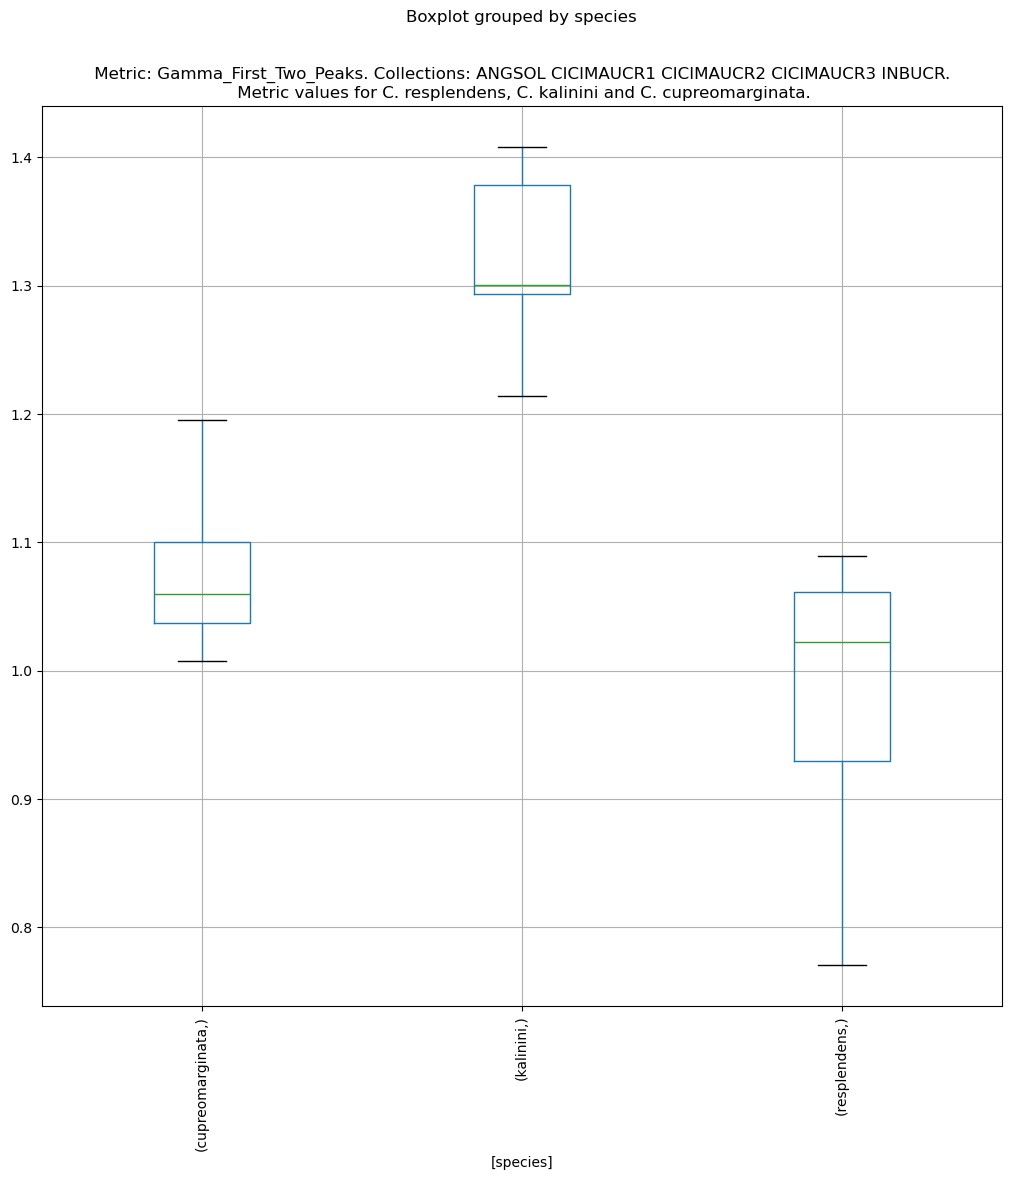

In [96]:
Metric_Testbench(Gamma_First_Two_Peaks, all_spectra)